# The Spark Foundation Internship Programme

# PREDICTION USING UNSUPERVISED ML:
SASWATA PAUL CHOUDHURY

File Source: https://bit.ly/3kXTdox


# Introduction
This data set contains data for 150 flowers from each species- stetosa, versicolor and virgibia. The data gives the measurement 
in centimeters of the variables special length , width and petal lenght and width for each colour.
Our goal here is From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

# Data set exploration

In [1]:
iris<-read.csv(file.choose())


In [3]:
data(iris)
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [4]:
irisScale = scale(iris[,-5])
head(irisScale)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
-0.8976739,1.01560199,-1.335752,-1.311052
-1.1392005,-0.13153881,-1.335752,-1.311052
-1.3807271,0.32731751,-1.392399,-1.311052
-1.5014904,0.09788935,-1.279104,-1.311052
-1.0184372,1.24503015,-1.335752,-1.311052
-0.5353840,1.93331463,-1.165809,-1.048667


# Basic 3D visualization

In [2]:
library(scatterplot3d)

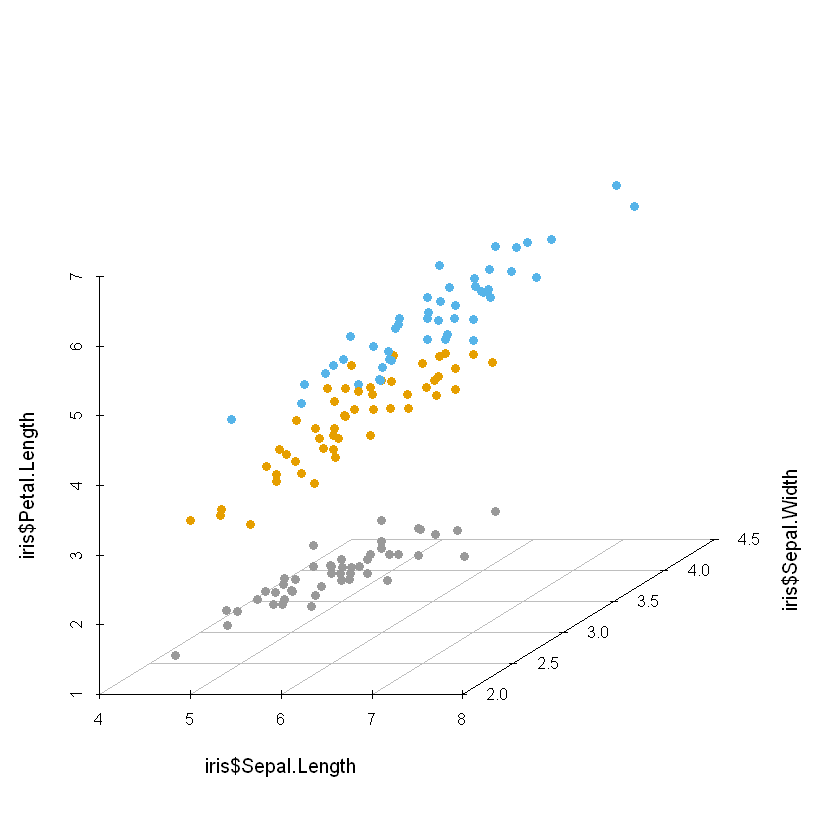

In [10]:
col=c("#999999","#E69F00","#56B4E9")
col=col[as.numeric(iris$Species)]
scatterplot3d(iris$Sepal.Length, iris$Sepal.Width,iris$Petal.Length, color=col,grid=TRUE,pch=16,box=FALSE)

#  3D scatter plot with regression line

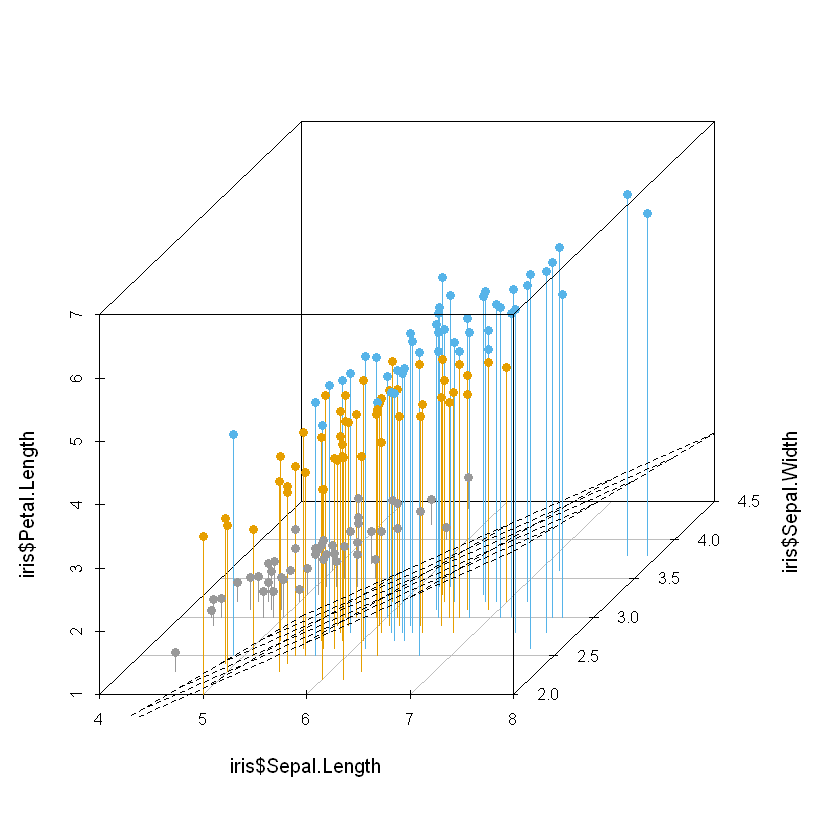

In [25]:
sp3d<-scatterplot3d(iris$Sepal.Length, iris$Sepal.Width,iris$Petal.Length, color=col,grid=TRUE,pch=16,type="h",angle=55)
#adding regression line
lm.first<-lm(iris$Petal.Width~iris$Sepal.Length+ iris$Sepal.Width)
sp3d$plane3d(lm.first)
sp3d$points3d(seq(10,20,2),seq(85,60,-5),seq(60,10,-10),col="red",type="h",pch=6)


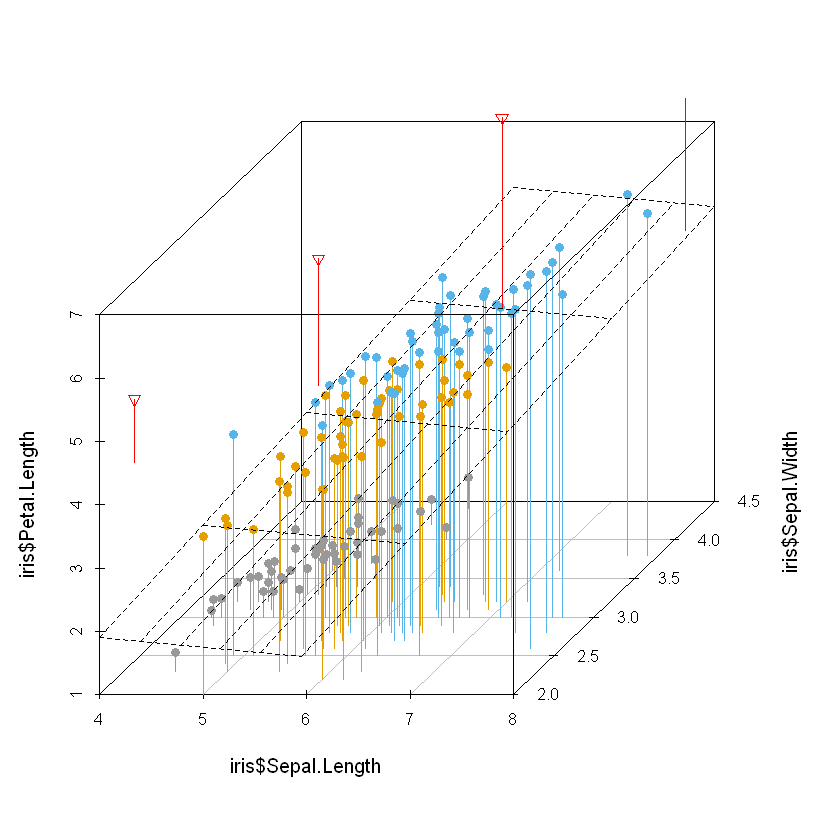

In [24]:
sp3d<-scatterplot3d(iris$Sepal.Length, iris$Sepal.Width,iris$Petal.Length, color=col,grid=TRUE,pch=16,type="h",angle=55)
#adding regression line
lm.second<-lm(iris$Petal.Length~iris$Sepal.Length+ iris$Sepal.Width)
sp3d$plane3d(lm.second)
sp3d$points3d(seq(1,10),seq(4,13),seq(1,10),col="red",type="h",pch=6)


# Visualization of clustering

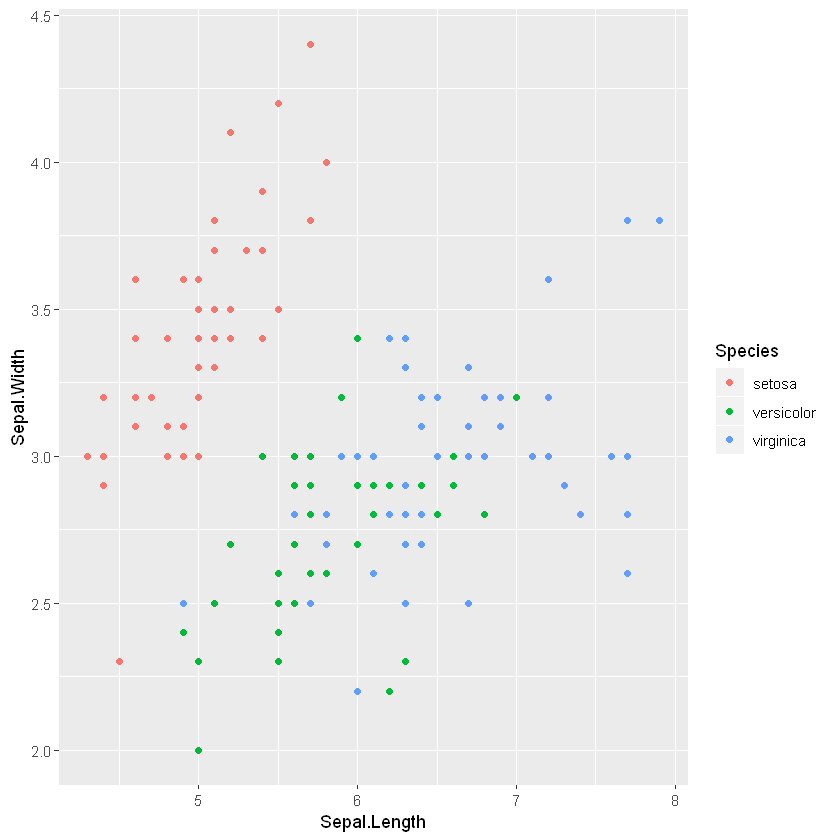

In [12]:
library(ggplot2)
ggplot(iris,aes(x = Sepal.Length, y = Sepal.Width, col= Species)) + geom_point()

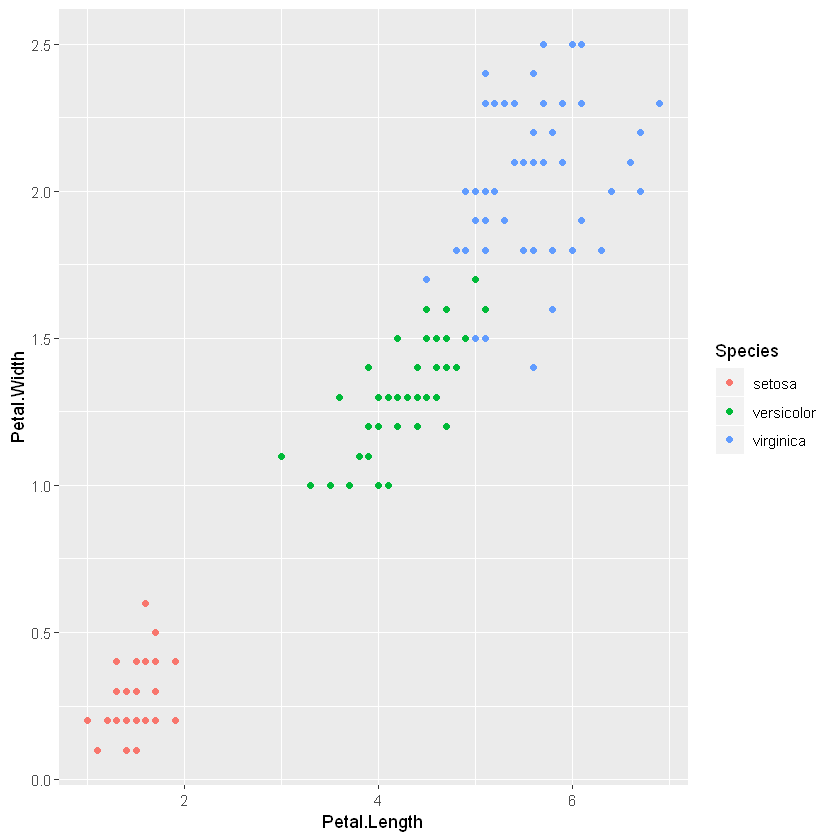

In [8]:
ggplot(iris,aes(x = Petal.Length, y = Petal.Width, col= Species)) + geom_point()

Petal.length and Petal.width which seperate out Setosa species with very high confidence.But we can see that Versicolor and Virginica Species are overlapped.

# Finding the optimimum number of clusters using Elbow method

In [11]:
K.max = 10  #maximum 10 cluster assume
wss = rep(NA, K.max = 10) #Repeat NA for 10 cluster i.e create vector with NA of size 10/1
nClust = list() #Initialize empty list for number of cluster

for(i in 1:K.max){
  irisclasses= kmeans(irisScale,i)    #object stored in iris class
  wss[i] = irisclasses$tot.withinss   #in irisclass,total wss distance allocated 
  nClust[[i]] = irisclasses$size      #size allocated to componant of list you have created
}

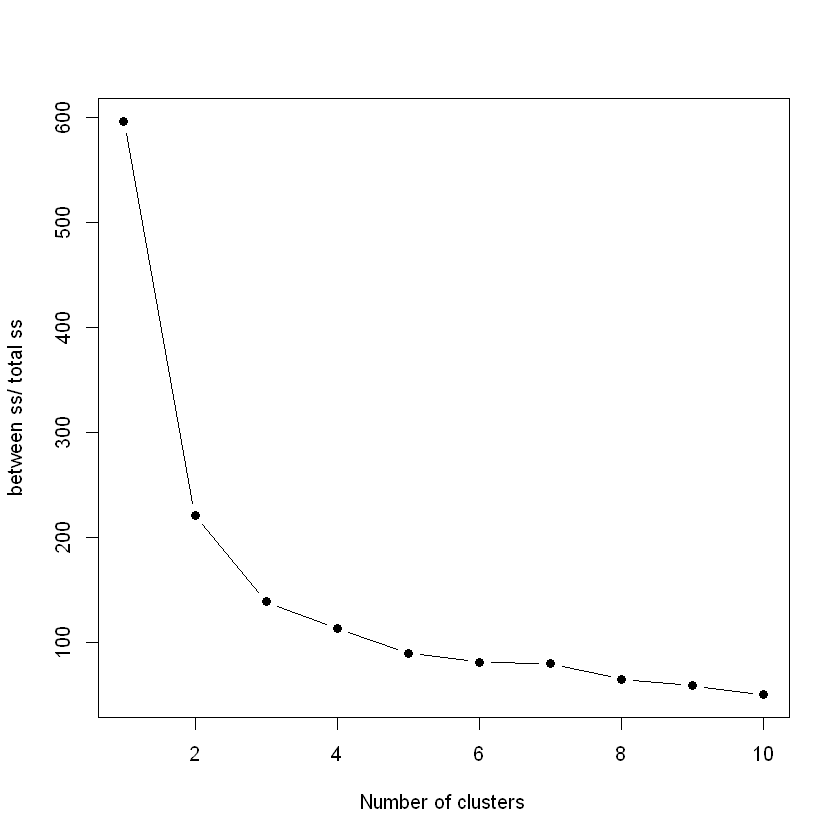

In [20]:
plot(1:K.max, wss, 
     type="b",pch = 19,   #b means both(line,point), pch: specify symbol used along with plot
     xlab= "Number of clusters",
     ylab="between ss/ total ss")

In [21]:
fitK = kmeans(irisScale, 3)
str(fitK)

List of 9
 $ cluster     : int [1:150] 2 2 2 2 2 2 2 2 2 2 ...
 $ centers     : num [1:3, 1:4] -0.0501 -1.0112 1.1322 -0.8804 0.8504 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "1" "2" "3"
  .. ..$ : chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
 $ totss       : num 596
 $ withinss    : num [1:3] 44.1 47.4 47.5
 $ tot.withinss: num 139
 $ betweenss   : num 457
 $ size        : int [1:3] 53 50 47
 $ iter        : int 2
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


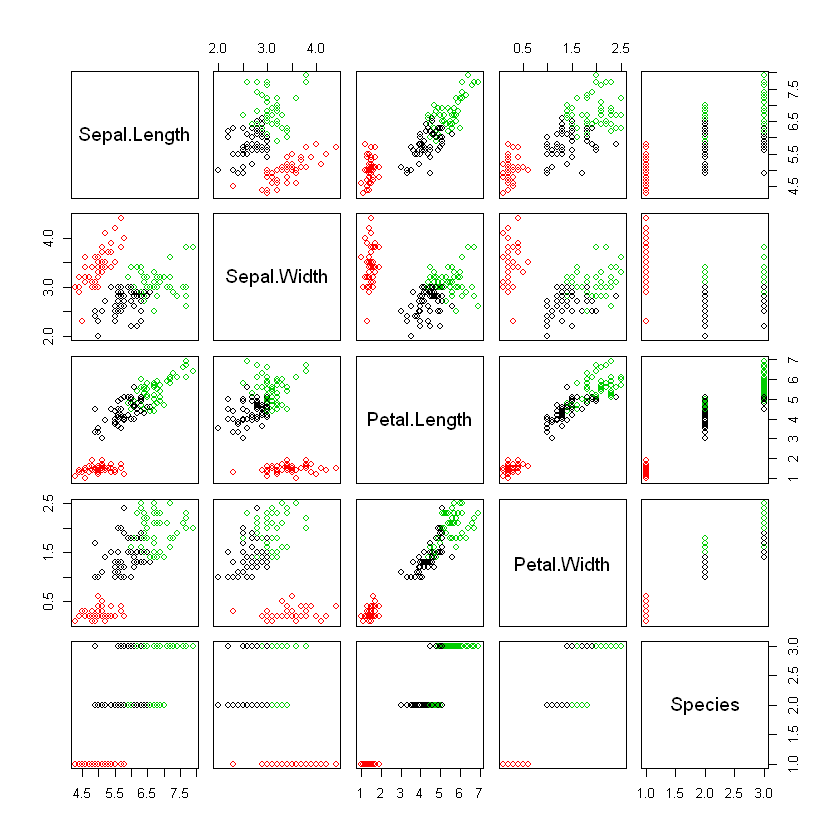

In [22]:
plot(iris,col = fitK$cluster)

# CONFUSION MATRIX

In [23]:
table(Predicted=fitK$cluster,Actual =iris$Species)

         Actual
Predicted setosa versicolor virginica
        1      0         39        14
        2     50          0         0
        3      0         11        36

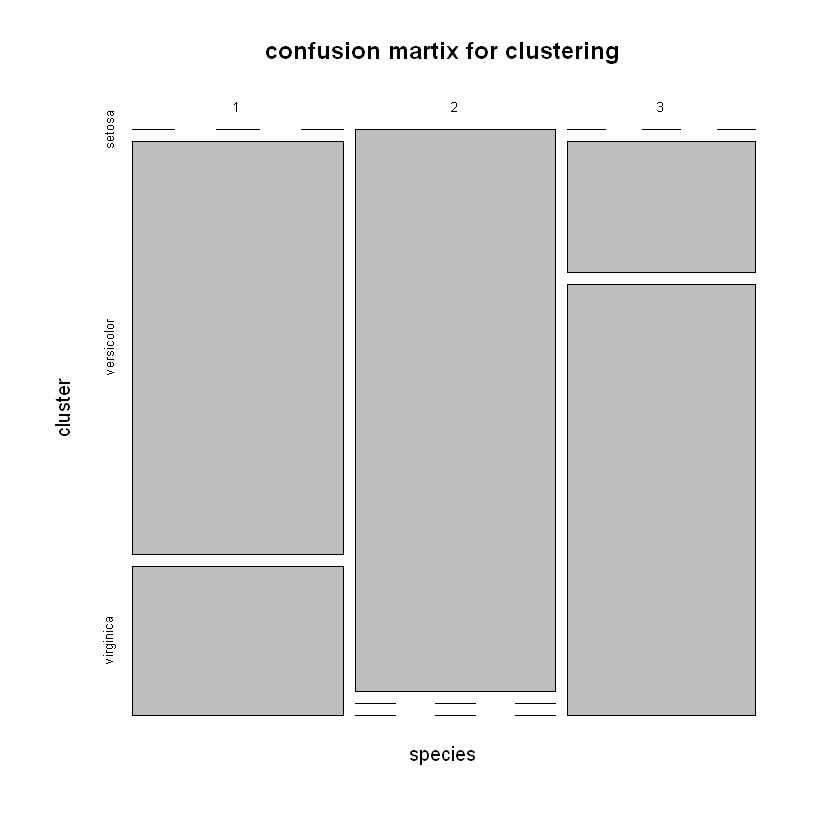

In [24]:
plot(table(Predicted=fitK$cluster,Actual =iris$Species), main="confusion martix for clustering", xlab="species",ylab="cluster")


In [25]:
#Total number of correctly classified instances are: 
50 + 39 + 36

[1] 125

In [26]:
#Total number of incorrectly classified instances are: 
11 + 14

[1] 25

In [27]:
#Accuracy
125/(125+25)    #i.e our model has achieved 83% accuracy

[1] 0.8333333